In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from metrics.f1score import F1Score
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf

## Data Preperation

In [2]:
training_set = image_dataset_from_directory(
    "./train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 76515 files belonging to 4 classes.


In [3]:
validation_set = image_dataset_from_directory(
    "./val",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 21861 files belonging to 4 classes.


In [5]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [6]:
INPUT_SHAPE = (224, 224, 3)

In [7]:
mobnet = tf.keras.applications.MobileNetV3Large(
    input_shape=INPUT_SHAPE,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
    #name="MobileNetV3Large",
)

In [8]:
model = tf.keras.Sequential()

In [9]:
model.add(tf.keras.Input(shape=INPUT_SHAPE))

In [10]:
model.add(mobnet)

In [11]:
model.add(tf.keras.layers.Dense(units=4, activation="softmax"))

In [12]:
metrics_list = ["accuracy",F1Score()]

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=metrics_list)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 1000)             5507432   
 l)                                                              
                                                                 
 dense (Dense)               (None, 4)                 4004      
                                                                 
Total params: 5,511,436
Trainable params: 5,487,036
Non-trainable params: 24,400
_________________________________________________________________


In [15]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15
4783/4783 [==============================] - 466s 96ms/step - loss: 0.9940 - accuracy: 0.8703 - f1_score: 0.2810 - val_loss: 0.7524 - val_accuracy: 0.8787 - val_f1_score: 0.8574
Epoch 2/15
4783/4783 [==============================] - 460s 96ms/step - loss: 0.5884 - accuracy: 0.9204 - f1_score: 0.8669 - val_loss: 0.4564 - val_accuracy: 0.9614 - val_f1_score: 0.8755
Epoch 3/15
4783/4783 [==============================] - 462s 97ms/step - loss: 0.3786 - accuracy: 0.9570 - f1_score: 0.9117 - val_loss: 0.3033 - val_accuracy: 0.9638 - val_f1_score: 0.9317
Epoch 4/15
4783/4783 [==============================] - 462s 97ms/step - loss: 0.2572 - accuracy: 0.9642 - f1_score: 0.9618 - val_loss: 0.2181 - val_accuracy: 0.9655 - val_f1_score: 0.9650
Epoch 5/15
4783/4783 [==============================] - 461s 96ms/step - loss: 0.1812 - accuracy: 0.9704 - f1_score: 0.9704 - val_loss: 0.1613 - val_accuracy: 0.9709 - val_f1_score: 0.9708
Epoch 6/15
4783/4783 [==============================] -

In [16]:
model.save("./Trained_Eye_Disease_model.h5")
model.save("./Trained_Eye_Disease_model.keras")

In [17]:
training_history.history

{'loss': [0.9940394759178162,
  0.5884097814559937,
  0.37861794233322144,
  0.257240355014801,
  0.18122932314872742,
  0.1356762945652008,
  0.10629953444004059,
  0.08752493560314178,
  0.07209713011980057,
  0.06382858753204346,
  0.058743856847286224,
  0.05118223652243614,
  0.046615976840257645,
  0.043447043746709824,
  0.03991827368736267],
 'accuracy': [0.8702738285064697,
  0.9203685522079468,
  0.9570149779319763,
  0.9642031192779541,
  0.9704241156578064,
  0.9754427075386047,
  0.9791936278343201,
  0.9822649359703064,
  0.9856629371643066,
  0.9873880743980408,
  0.9875187873840332,
  0.9895837306976318,
  0.9904593825340271,
  0.9911912679672241,
  0.9918055534362793],
 'f1_score': [0.28100502490997314,
  0.8668642044067383,
  0.9116514921188354,
  0.9618012309074402,
  0.9703955054283142,
  0.9755119681358337,
  0.9793297052383423,
  0.9824494123458862,
  0.985585629940033,
  0.987309455871582,
  0.9875853061676025,
  0.9895535707473755,
  0.9904556274414062,
  0.9911

In [18]:
#Saving history
import pickle
with open("Training_history.pkl","wb") as f:
    pickle.dump(training_history.history,f)

In [4]:
import pickle
with open("Training_history.pkl","rb") as f:
    load_history = pickle.load(f)
print(load_history)

{'loss': [0.9940394759178162, 0.5884097814559937, 0.37861794233322144, 0.257240355014801, 0.18122932314872742, 0.1356762945652008, 0.10629953444004059, 0.08752493560314178, 0.07209713011980057, 0.06382858753204346, 0.058743856847286224, 0.05118223652243614, 0.046615976840257645, 0.043447043746709824, 0.03991827368736267], 'accuracy': [0.8702738285064697, 0.9203685522079468, 0.9570149779319763, 0.9642031192779541, 0.9704241156578064, 0.9754427075386047, 0.9791936278343201, 0.9822649359703064, 0.9856629371643066, 0.9873880743980408, 0.9875187873840332, 0.9895837306976318, 0.9904593825340271, 0.9911912679672241, 0.9918055534362793], 'f1_score': [0.28100502490997314, 0.8668642044067383, 0.9116514921188354, 0.9618012309074402, 0.9703955054283142, 0.9755119681358337, 0.9793297052383423, 0.9824494123458862, 0.985585629940033, 0.987309455871582, 0.9875853061676025, 0.9895535707473755, 0.9904556274414062, 0.9911097884178162, 0.9918100237846375], 'val_loss': [0.7524018287658691, 0.45638695359230

In [5]:
load_history.keys()

dict_keys(['loss', 'accuracy', 'f1_score', 'val_loss', 'val_accuracy', 'val_f1_score'])

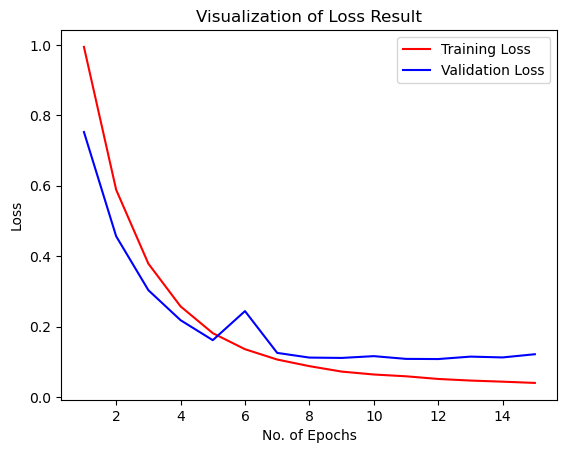

In [6]:
#Loss Visualization
epochs = [i for i in range(1,16)]
plt.plot(epochs,load_history['loss'],color='red',label='Training Loss')
plt.plot(epochs,load_history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()

## Model Evaluation

In [6]:
model = tf.keras.models.load_model("Trained_Eye_Disease_model.h5",custom_objects={'F1Score': F1Score})

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 1000)             5507432   
 l)                                                              
                                                                 
 dense (Dense)               (None, 4)                 4004      
                                                                 
Total params: 5,511,436
Trainable params: 5,487,036
Non-trainable params: 24,400
_________________________________________________________________


In [19]:
test_set = image_dataset_from_directory(
    "./test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 10933 files belonging to 4 classes.


In [20]:
test_loss,test_acc,f1_score = model.evaluate(test_set)

684/684 [==============================] - 108s 158ms/step - loss: 0.1260 - accuracy: 0.9709 - f1_score: 0.9712


In [21]:
test_loss, test_acc, f1_score

(0.12595215439796448, 0.9709137678146362, 0.9711748957633972)

In [22]:
#Computing True label from test set
true_categories = tf.concat([y for x, y in test_set],axis=0)
Y_true = tf.argmax(true_categories,axis=1)

In [23]:
true_categories

<tf.Tensor: shape=(10933, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)>

In [24]:
Y_true

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [25]:
#Computing Predicted labels using test set
predicted_categories = model.predict(test_set)
predicted_categories

684/684 [==============================] - 107s 156ms/step


array([[9.9363130e-01, 2.2562260e-03, 2.9854884e-03, 1.1269421e-03],
       [9.9363130e-01, 2.2562260e-03, 2.9854884e-03, 1.1269421e-03],
       [9.9363130e-01, 2.2562260e-03, 2.9854884e-03, 1.1269421e-03],
       ...,
       [4.6314392e-04, 1.6484937e-03, 2.7523085e-03, 9.9513608e-01],
       [4.4188753e-04, 1.5880615e-03, 2.6285935e-03, 9.9534142e-01],
       [4.4188753e-04, 1.5880615e-03, 2.6285935e-03, 9.9534142e-01]],
      dtype=float32)

In [26]:
Y_pred = tf.argmax(predicted_categories,axis=1)
Y_pred

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

## Classification Report

In [27]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3746
           1       0.97      0.94      0.96      1161
           2       0.91      0.83      0.87       887
           3       0.98      0.99      0.99      5139

    accuracy                           0.97     10933
   macro avg       0.96      0.94      0.95     10933
weighted avg       0.97      0.97      0.97     10933



## Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true,Y_pred)
cm

array([[3685,   10,   49,    2],
       [  23, 1090,    3,   45],
       [  81,    7,  735,   64],
       [   4,   13,   17, 5105]], dtype=int64)

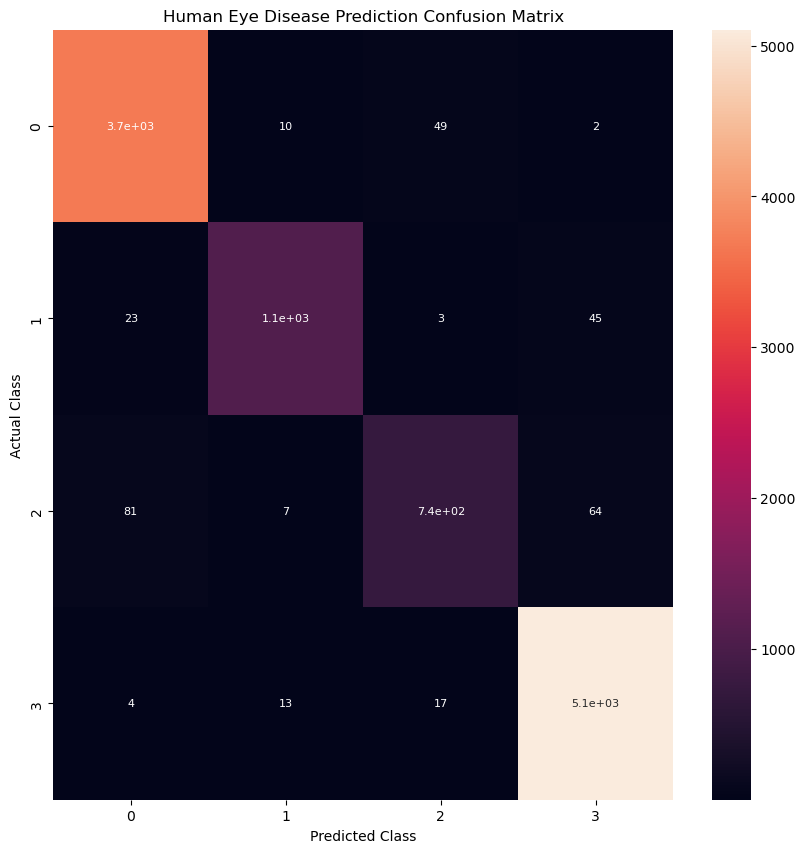

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,annot_kws={"size":8})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Human Eye Disease Prediction Confusion Matrix",fontsize=12)
plt.show()